In [1]:
from EACommunicator_API import EACommunicator_API
import sys

############################################
# ALL API
############################################
#
#
#    def Disconnect(self):
#    def Connect(self,
#                server: str = 'localhost',
#                port: int = 5555) -> bool:
#    def Check_connection(self) -> bool:
#    def IsConnected(self) -> bool:
#    def Get_instrument_info(self,
#                            instrument: str = 'EURUSD') -> dict:
#    def Update_instruments(self, selected=True) -> bool:
#    def Get_instruments(self, selected=True) ->list:
#    def Get_last_x_ticks_from_now(self,
#                                  instrument: str = 'EURUSD',
#                                  nbrofticks: int = 2000) -> np.array:
#    def Get_last_x_bars_from_now(self,
#                                 instrument: str = 'EURUSD',
#                                 timeframe: str = 'D1',
#                                 nbrofbars: int = 1000) -> np.array:
#    def Get_all_orders(self) -> pd.DataFrame:
#    def readCsv(self, inputCsvString):
#    def Get_all_open_positions(self) -> pd.DataFrame:
#    def Get_all_closed_positions(self) -> pd.DataFrame:
#    def Open_order(self,
#                   instrument: str = '',
#                   ordertype: str = 'buy',
#                   volume: float = 0.01,
#                   openprice: float = 0.0,
#                   slippage: int = 5,
#                   magicnumber: int = 0,
#                   stoploss: float = 0.0,
#                   takeprofit: float = 0.0,
#                   comment: str = '',
#                   market: bool = False
#                   ) -> int:
#    def Close_position_by_ticket(self,
#                                 ticket: int = 0) -> bool:
#    def Close_position_partial_by_ticket(self,
#                                         ticket: int = 0,
#                                         volume_to_close: float = 0.01) -> bool:
#    def Delete_order_by_ticket(self,
#                               ticket: int = 0) -> bool:
#    def Set_sl_and_tp_for_position(self,
#                                   ticket: int = 0,
#                                   stoploss: float = 0.0,
#                                   takeprofit: float = 0.0) -> bool:
#    def Set_sl_and_tp_for_order(self,
#                                ticket: int = 0,
#                                stoploss: float = 0.0,
#                                takeprofit: float = 0.0) -> bool:
#    def Change_settings_for_pending_order(self,
#                                ticket: int = 0,
#                                price: float = -1.0,
#                                stoploss: float = -1.0,
#                                takeprofit: float = -1.0) -> bool:
#    def Get_last_tick_info(self, symbol):
#    def send_command(self,
#                     command: TradingCommands, arguments: str = ''):
#    def get_timeframe_value(self,
#                            timeframe: str = 'M1') -> int:

In [2]:
mt = EACommunicator_API()
mt.Connect(server='host.docker.internal')

In [ ]:
Symbols = mt.Get_instruments(False)

In [4]:
stocks=['#TSLA']

In [5]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 100)

def Get_ohlcv(instrument='EURUSD', timeframe='D', nbrofbars=20):
    df = pd.DataFrame(mt.Get_last_x_bars_from_now(instrument, timeframe,nbrofbars))
    df = df.iloc[:, 1:].set_index('Time')
    df.index = pd.to_datetime(df.index)
    df.columns = [c.lower() for c in df.columns]
    return df

In [6]:
df = Get_ohlcv(instrument=stocks[0], timeframe='D', nbrofbars=2000)
df

,open,high,low,close,volume
Time,,,,,
2019-06-24,14.89,15.03,14.72,14.90,8262
2019-06-25,14.96,14.99,14.62,14.64,6885
2019-06-26,14.69,15.13,14.53,14.61,9102
2019-06-27,14.61,14.84,14.47,14.84,8911
2019-06-28,14.77,15.00,14.73,14.88,9737
...,...,...,...,...,...
2019-11-07,21.92,22.75,21.86,22.36,21865
2019-11-08,22.31,22.49,22.16,22.45,14591
2019-11-11,22.86,23.27,22.83,22.99,16596


In [17]:
from functools import reduce
def recursive_reduce(cond_dict, conditions):
    def reduce_op(a,b):
        #print(f'OP = {a} {list(cond_dict.keys())[0]} {b}')
        if list(cond_dict.keys())[0]=='|':
            return a|b
        elif list(cond_dict.keys())[0]=='&':
            return a&b
        else:
            return False
    conds = []
    for cond in list(cond_dict.values())[0]:
        print(f'A : {cond}')
        if type(cond) == dict:
            conds.append(recursive_reduce(cond, conditions))
        else:
            if cond in conditions:
                conds.append(conditions[cond])
            else:
                print(cond + ' is not in conditions!')
            
    if list(cond_dict.keys())[0]=='~':
        print(f'B : {conds[0]}')
        return ~conds[0]
    else:
        return reduce(reduce_op, conds)


In [22]:
conditions = {'up_candle1' : (df['close']>df['open']).shift()}
cond_dict = {'~':['up_candle1']}

In [28]:
#recursive_reduce(cond_dict, conditions)
(df['close']>df['open']).shift().astype(bool)

Time
2019-06-24     True
2019-06-25     True
2019-06-26    False
2019-06-27    False
2019-06-28     True
              ...  
2019-11-07     True
2019-11-08     True
2019-11-11     True
2019-11-12     True
2019-11-13     True
Length: 101, dtype: bool

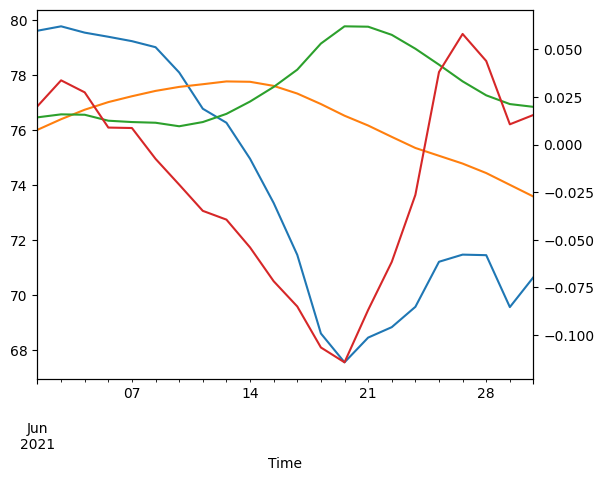

In [24]:
import matplotlib.pyplot as plt


sta_date = '20210601'
end_date = '20210630'
df['close'][sta_date:end_date].plot()
df['close'].rolling(21).mean()[sta_date:end_date].plot()
#df['close'].rolling(21).mean().rolling(5).std()[sta_date:end_date].plot(secondary_y=True)
#(df['close'].rolling(21).std()/df['close'].rolling(21).mean())[sta_date:end_date].plot(secondary_y=True)
(df['close'].rolling(10).std()/df['close'])[sta_date:end_date].plot(secondary_y=True)
(df['close']/df['close'].shift(5)-1)[sta_date:end_date].plot(secondary_y=True)
#(true_range(df)/df['close'].rolling(21).mean())[sta_date:end_date].plot(secondary_y=True)
plt.show()

In [50]:
def true_range(df):
    df['C-H'] = (df['close']-df['high'].shift()).abs()
    df['C-L'] = (df['close']-df['low'].shift()).abs()
    df['H-L'] = (df['high']-df['low'].shift()).abs()
    return df.loc[:,['C-H','C-L','H-L']].agg('max',axis=1)

In [6]:
orders = mt.Get_all_closed_positions()

In [64]:
oc_max = df[sta_date:end_date][['open','close']].max(axis=1)
oc_min = df[sta_date:end_date][['open','close']].min(axis=1)

oc_ovlp = (oc_min < oc_max.shift()) & (oc_max > oc_min.shift())
oc_ovlp_grp = (~oc_ovlp).cumsum()

#(df[sta_date:end_date]['close']).plot()
#(df[sta_date:end_date]['open']).plot()
oc_max.iloc[:-1].groupby(by=oc_ovlp_grp.iloc[:-1]).min().iloc[-2]

71.21

In [4]:

    open_position = mt.Get_all_open_positions()

In [5]:
open_position

,ticket,symbol,position_type,volume,openprice,stoploss,takeprofit,opentime,profit,comment
0,17690817,#MRNA,buy,10.0,84.98,83.44,0.0,2024.02.14,86.60,STOCK_HIT_BBANDS_LB
1,17631137,#LI,buy,10.0,30.33,31.57,0.0,2024.02.07,77.10,NaN
2,17536617,#LI,buy,10.0,27.75,31.57,0.0,2024.01.30,102.90,NaN
3,17630823,#INTC,buy,10.0,43.07,41.50,0.0,2024.02.07,22.40,NaN
4,17690815,#DPW,buy,10.0,42.24,41.32,0.0,2024.02.14,2.17,STOCK_HIT_BBANDS_LB
5,17756793,#CMCSA,buy,10.0,41.76,40.51,0.0,2024.02.21,2.50,NaN
6,17670443,#BOUY,buy,10.0,33.18,32.60,0.0,2024.02.13,30.95,STOCK_HIT_BBANDS_LB
7,17756806,#ADBE,buy,10.0,537.23,528.17,0.0,2024.02.21,296.70,NaN


In [1]:
max(1,2,3)

3

In [13]:
a = {'&':['x','y','z']}

In [14]:
for i in (a.values()):
    print(i)

['x', 'y', 'z']


In [20]:
list(a.values())[0][0]

'x'

In [6]:
a=[1,2,3]

In [7]:
b=a[:]

In [8]:
a.remove(1)
a

[2, 3]

In [9]:
b

[1, 2, 3]